In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
MXT = pd.read_csv("M16M-MT01.csv")
MXH_T3 = pd.read_csv("M16M2-MH3.csv")
MXH_T10 = pd.read_csv("M16M3-MH10.csv")
ChiT = pd.read_csv("MagProp.out",skiprows=13,sep='\s+')

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\55219\AppData\Local\Temp\ipykernel_20084\1712424293.py:4: SyntaxWarning: invalid escape sequence '\s'
  ChiT = pd.read_csv("MagProp.out",skiprows=13,sep='\s+')


In [7]:
# chi_mol/chi_grama = 780.309985097

[]

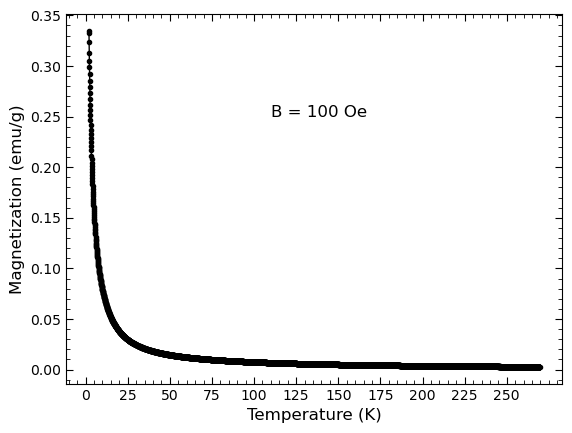

In [9]:
import matplotlib.pyplot as plt  

x = MXT['Temperature (K)']
y = MXT['M (emu/g)']

plt.figure()
ax_main = plt.gca()

ax_main.set_xlabel(r"Temperature (K)", fontsize=12)
ax_main.set_ylabel(r"Magnetization (emu/g)", fontsize=12)
ax_main.set_xticks(range(0, 251, 25))


ax_main.scatter(x, y, color="black", s=5)
ax_main.plot(x, y, color="black", label="T = 10 K", linestyle='-', marker='o', linewidth=1, markersize=3)
ax_main.text(110, 0.25, "B = 100 Oe", fontsize=12)

# Adiciona ticks na lateral direita e no topo
ax_main.tick_params(axis="both", direction="in", top=True, right=True)
# Define os ticks principais e menores
ax_main.set_xticks(range(0, 251, 25))
ax_main.minorticks_on()

# Configura os ticks principais e subticks nos quatro lados
ax_main.tick_params(axis="both", which="major", direction="in", top=True, right=True, length=5)
ax_main.tick_params(axis="both", which="minor", direction="in", top=True, right=True, length=3)
plt.plot()

# Salvar em PDF
#plt.savefig("MXT.pdf", format="pdf", dpi=300, bbox_inches="tight")
#plt.close()  # Fecha a figura para liberar memória


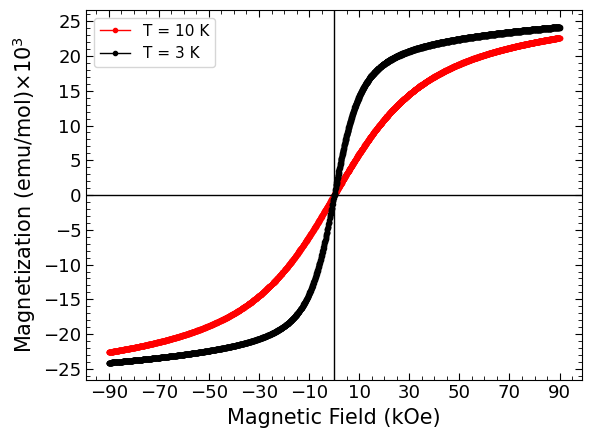

In [33]:
import matplotlib.pyplot as plt  

x_1 = MXH_T3['Magnetic Field (Oe)']*10
y_1 = MXH_T3['M (emu/g)']*780.31/1000
x_2 = MXH_T10['Magnetic Field (Oe)']*10
y_2 = MXH_T10['M (emu/g)']*780.31/1000

plt.figure()
ax_main = plt.gca()

ax_main.set_xlabel(r"Magnetic Field (kOe)", fontsize=15)
ax_main.set_ylabel(r"Magnetization (emu/mol)$\times 10^{3}$", fontsize=15)


ax_main.plot(x_2 / 10000, y_2, label="T = 10 K", linestyle='-', marker='o', linewidth=1, markersize=3, color='red', markeredgecolor='red')
ax_main.plot(x_1 / 10000, y_1, color="black", label="T = 3 K", linestyle='-', marker='o', linewidth=1, markersize=3)

ax_main.axhline(y=0, color='black', linewidth=1)
ax_main.axvline(x=0, color='black', linewidth=1)

# Define os ticks do eixo x de -9 a 9 com passo de 1
ax_main.set_xticks(range(-90, 100, 20))
ax_main.set_yticks(range(-25, 30, 5))

# Ativa os subticks e configura ticks principais e menores
ax_main.minorticks_on()
ax_main.tick_params(axis="both", which="major", direction="in", top=True, right=True, length=5, labelsize=13)
ax_main.tick_params(axis="both", which="minor", direction="in", top=True, right=True, length=3)


ax_main.legend(fontsize=11)

#plt.show()

# Salvar em PDF
plt.savefig("MXH.pdf", format="pdf", dpi=300, bbox_inches="tight")
#plt.close()  # Fecha a figura para liberar memória


In [12]:
import numpy as np

x_filtro = x_1[(x_1 > 70000) & (x_1 < 90000)]


In [45]:
x_filtro

517     70088.191406
518     70238.761719
519     70404.824219
520     70460.164062
521     70570.503906
            ...     
3319    89202.480469
3320    89423.632812
3321    89494.101562
3322    89609.664062
3323    89720.144531
Name: Magnetic Field (Oe), Length: 448, dtype: float64

In [48]:
x_1[517:3323+1]

517     70088.191406
518     70238.761719
519     70404.824219
520     70460.164062
521     70570.503906
            ...     
3319    89202.480469
3320    89423.632812
3321    89494.101562
3322    89609.664062
3323    89720.144531
Name: Magnetic Field (Oe), Length: 2807, dtype: float64

In [46]:
y_filtro = y_1[517:3323+1]

In [47]:
y_filtro

517     30.077959
518     30.088600
519     30.093870
520     30.100327
521     30.106755
          ...    
3319    30.797188
3320    30.805650
3321    30.809346
3322    30.812852
3323    30.816405
Name: M (emu/g), Length: 2807, dtype: float64

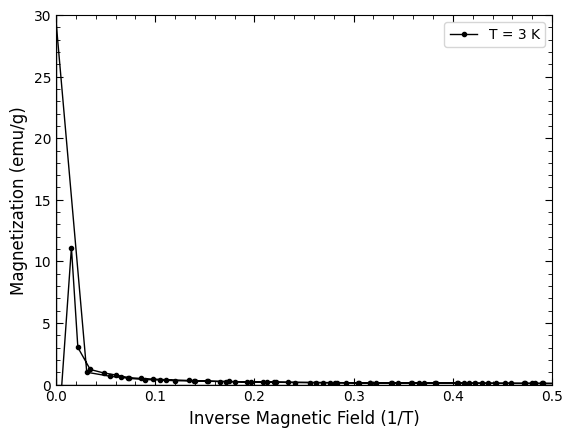

In [49]:
import matplotlib.pyplot as plt  

x_1 = MXH_T3['Magnetic Field (Oe)']
y_1 = MXH_T3['M (emu/g)']
x_2 = MXH_T10['Magnetic Field (Oe)']
y_2 = MXH_T10['M (emu/g)']

plt.figure()
ax_main = plt.gca()

ax_main.set_xlabel(r"Inverse Magnetic Field (1/T)", fontsize=12)
ax_main.set_ylabel(r"Magnetization (emu/g)", fontsize=12)

#ax_main.plot(x_2 / 10000, y_2, label="T = 10 K", linestyle='-', marker='o', linewidth=1, markersize=3, color='red', markeredgecolor='red')
ax_main.plot(x_1[517:3323+1] / 10000, 1/y_1[517:3323+1], color="black", label="T = 3 K", linestyle='-', marker='o', linewidth=1, markersize=3)

ax_main.axhline(y=0, color='black', linewidth=1)
ax_main.axvline(x=0, color='black', linewidth=1)

# Define os ticks do eixo x de -9 a 9 com passo de 1
#ax_main.set_xticks(range(0, 10, 1))

ax_main.set_xlim(0,0.5)
ax_main.set_ylim(0,30)

# Ativa os subticks e configura ticks principais e menores
ax_main.minorticks_on()
ax_main.tick_params(axis="both", which="major", direction="in", top=True, right=True, length=5)
ax_main.tick_params(axis="both", which="minor", direction="in", top=True, right=True, length=3)

ax_main.legend()
plt.show()

# Salvar em PDF
#plt.savefig("MXT.pdf", format="pdf", dpi=300, bbox_inches="tight")
#plt.close()  # Fecha a figura para liberar memória


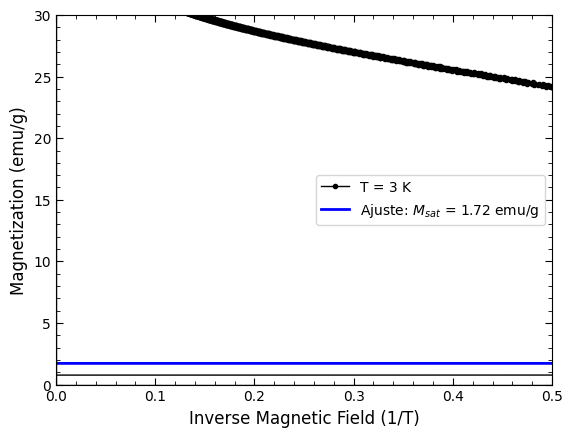

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dados (intervalo escolhido manualmente)
x = x_1[517:3323+1] / 10000  # campo em Tesla (1 T = 10 kOe)
y = y_1[517:3323+1]

# Transformação: x_fit = 1/H
x_fit = 1 / x
y_fit = y

# Função do modelo: M = M_sat - b/H
def modelo(x_inv, M_sat, b):
    return M_sat - b * x_inv

# Ajuste
param, cov = curve_fit(modelo, x_fit, y_fit)
M_sat, b = param

# Geração dos valores ajustados para plot
x_fit_sorted = np.sort(x_fit)
y_ajustado = modelo(x_fit_sorted, M_sat, b)

# Plot
plt.figure()
ax_main = plt.gca()

ax_main.set_xlabel(r"Inverse Magnetic Field (1/T)", fontsize=12)
ax_main.set_ylabel(r"Magnetization (emu/g)", fontsize=12)

# Dados experimentais
ax_main.plot(x_fit, y_fit, color="black", label="T = 3 K", linestyle='-', marker='o', linewidth=1, markersize=3)

# Ajuste
ax_main.plot(x_fit_sorted, y_ajustado, label=fr"Ajuste: $M_{{sat}}$ = {M_sat:.2f} emu/g", color="blue", linewidth=2)

# Eixos
ax_main.axhline(y=0, color='black', linewidth=1)
ax_main.axvline(x=0, color='black', linewidth=1)

ax_main.set_xlim(0, 0.5)
ax_main.set_ylim(0, 30)

ax_main.minorticks_on()
ax_main.tick_params(axis="both", which="major", direction="in", top=True, right=True, length=5)
ax_main.tick_params(axis="both", which="minor", direction="in", top=True, right=True, length=3)

ax_main.legend()
plt.show()


In [6]:
x = ChiT['Temperature']
y_1 = ChiT['ChiT_Data']
y_2 = ChiT['ChiT_Model']


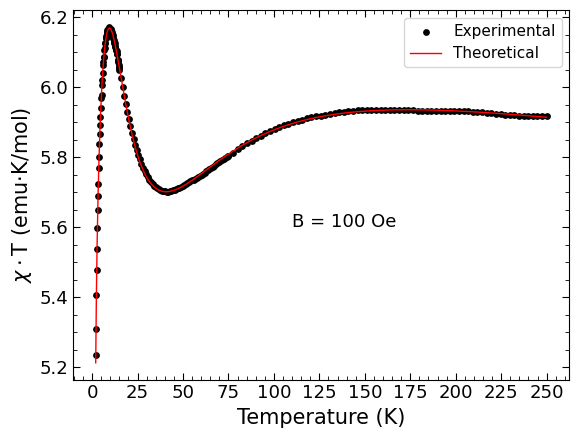

In [41]:
import matplotlib.pyplot as plt  

x = ChiT['Temperature']
y_1 = ChiT['ChiT_Data']
y_2 = ChiT['ChiT_Model']

plt.figure()
ax_main = plt.gca()

ax_main.set_xlabel(r"Temperature (K)", fontsize=15)
ax_main.set_ylabel(r"$\chi \cdot \text{T}$ (emu$\cdot$K/mol)", fontsize=15)

ax_main.scatter(x, y_1, label="Experimental", marker='o', linewidth=1, color='black', s=15)
ax_main.plot(x, y_2, color="red", label="Theoretical", linewidth=1)

ax_main.text(110, 5.6, "B = 100 Oe", fontsize=13)

# Define os ticks principais e menores
ax_main.set_xticks(range(0, 251, 25))
ax_main.minorticks_on()

# Configura os ticks principais e subticks nos quatro lados
ax_main.tick_params(axis="both", which="major", direction="in", top=True, right=True, length=5, labelsize=13)
ax_main.tick_params(axis="both", which="minor", direction="in", top=True, right=True, length=3)

ax_main.legend(fontsize=11)
#plt.show()

# Salvar em PDF
plt.savefig("ChiTXT.pdf", format="pdf", dpi=300, bbox_inches="tight")
#plt.close()  # Fecha a figura para liberar memória